### Import Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_column', 250)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
from matplotlib import rcParams
rcParams['figure.figsize'] = (5, 3)
rcParams['figure.dpi'] = 150
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

import arff

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

### Read Data

In [3]:
data = arff.load(open('../data/elecNormNew.arff'))
cnames = [i[0] for i in data['attributes']]
df = pd.DataFrame(data['data'], columns=cnames)
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [13]:
df.describe()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.499080,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526
std,0.340308,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912
50%,0.456329,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912
75%,0.880547,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#sns.pairplot(df, hue='class')

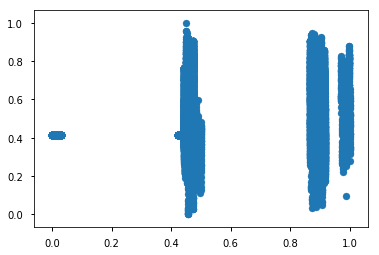

In [5]:
plt.scatter(df.date, df.transfer)

### Preprocess

In [6]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [7]:
X = df.iloc[:,1:-1]
y = df['class']

In [8]:
display(X.head())
display(y.head())

,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912
1,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912
2,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912
3,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912
4,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912


0    1
1    1
2    1
3    1
4    0
Name: class, dtype: int64

### Splitting data

Data is thought as batches and when every new batch arrives a new model is trained with the same parameters.

In [10]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42, test_size=0.1, shuffle=False)

## Naive Bayes

### Model Deployment & Evaluation

In [11]:
NB = GaussianNB()
NB.fit(train_X, train_y)

print("Training set score: {:.3f}".format(NB.score(train_X, train_y)))
print("Test set score: {:.3f}".format(NB.score(val_X, val_y)))

scores = cross_val_score(NB, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))

Training set score: 0.710
Test set score: 0.777
Cross-validation scores: [0.80304535 0.76089595 0.66188479 0.61895829 0.82608696]


## Support Vector Machine

### Grid Search

In [20]:
param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': ['auto', 0.001, 0.01, 0.1, 1]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, verbose=10)
grid.fit(train_X, train_y)
print(grid.score(val_X, val_y))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] kernel=rbf, C=0.001, gamma=auto .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  kernel=rbf, C=0.001, gamma=auto, score=0.5756951596292482, total=  27.1s
[CV] kernel=rbf, C=0.001, gamma=auto .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.8s remaining:    0.0s


[CV]  kernel=rbf, C=0.001, gamma=auto, score=0.5756951596292482, total=  21.9s
[CV] kernel=rbf, C=0.001, gamma=auto .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV]  kernel=rbf, C=0.001, gamma=auto, score=0.5756951596292482, total=  22.0s
[CV] kernel=rbf, C=0.001, gamma=auto .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s


[CV]  kernel=rbf, C=0.001, gamma=auto, score=0.5756951596292482, total=  22.7s
[CV] kernel=rbf, C=0.001, gamma=auto .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s


[CV]  kernel=rbf, C=0.001, gamma=auto, score=0.5756327251324308, total=  22.8s
[CV] kernel=poly, C=0.001, gamma=auto ................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min remaining:    0.0s


[CV]  kernel=poly, C=0.001, gamma=auto, score=0.577460644401942, total=  16.8s
[CV] kernel=poly, C=0.001, gamma=auto ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.3min remaining:    0.0s


[CV]  kernel=poly, C=0.001, gamma=auto, score=0.5777548918640577, total=  16.7s
[CV] kernel=poly, C=0.001, gamma=auto ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.6min remaining:    0.0s


[CV]  kernel=poly, C=0.001, gamma=auto, score=0.5793732529056936, total=  16.9s
[CV] kernel=poly, C=0.001, gamma=auto ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.0min remaining:    0.0s


[CV]  kernel=poly, C=0.001, gamma=auto, score=0.577460644401942, total=  17.0s
[CV] kernel=poly, C=0.001, gamma=auto ................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.4min remaining:    0.0s


[CV]  kernel=poly, C=0.001, gamma=auto, score=0.5772513243084167, total=  17.0s
[CV] kernel=sigmoid, C=0.001, gamma=auto .............................
[CV]  kernel=sigmoid, C=0.001, gamma=auto, score=0.5756951596292482, total=  30.0s
[CV] kernel=sigmoid, C=0.001, gamma=auto .............................
[CV]  kernel=sigmoid, C=0.001, gamma=auto, score=0.5756951596292482, total=  31.0s
[CV] kernel=sigmoid, C=0.001, gamma=auto .............................
[CV]  kernel=sigmoid, C=0.001, gamma=auto, score=0.5756951596292482, total=  30.0s
[CV] kernel=sigmoid, C=0.001, gamma=auto .............................
[CV]  kernel=sigmoid, C=0.001, gamma=auto, score=0.5756951596292482, total=  29.2s
[CV] kernel=sigmoid, C=0.001, gamma=auto .............................
[CV]  kernel=sigmoid, C=0.001, gamma=auto, score=0.5756327251324308, total=  29.8s
[CV] kernel=rbf, C=0.001, gamma=0.001 ................................
[CV]  kernel=rbf, C=0.001, gamma=0.001, score=0.5756951596292482, total=  22.4s

[CV]  kernel=rbf, C=0.001, gamma=1, score=0.5756327251324308, total=  21.8s
[CV] kernel=poly, C=0.001, gamma=1 ...................................
[CV]  kernel=poly, C=0.001, gamma=1, score=0.729145211122554, total=  17.3s
[CV] kernel=poly, C=0.001, gamma=1 ...................................
[CV]  kernel=poly, C=0.001, gamma=1, score=0.7304693247020745, total=  17.4s
[CV] kernel=poly, C=0.001, gamma=1 ...................................
[CV]  kernel=poly, C=0.001, gamma=1, score=0.7281153450051493, total=  16.9s
[CV] kernel=poly, C=0.001, gamma=1 ...................................
[CV]  kernel=poly, C=0.001, gamma=1, score=0.7250257466529351, total=  17.2s
[CV] kernel=poly, C=0.001, gamma=1 ...................................
[CV]  kernel=poly, C=0.001, gamma=1, score=0.7238081224249558, total=  17.3s
[CV] kernel=sigmoid, C=0.001, gamma=1 ................................
[CV]  kernel=sigmoid, C=0.001, gamma=1, score=0.5756951596292482, total=  29.1s
[CV] kernel=sigmoid, C=0.001, gamm

[CV]  kernel=sigmoid, C=0.01, gamma=0.01, score=0.5756327251324308, total=  29.1s
[CV] kernel=rbf, C=0.01, gamma=0.1 ...................................
[CV]  kernel=rbf, C=0.01, gamma=0.1, score=0.5761365308224217, total=  23.1s
[CV] kernel=rbf, C=0.01, gamma=0.1 ...................................
[CV]  kernel=rbf, C=0.01, gamma=0.1, score=0.5779020155951154, total=  22.4s
[CV] kernel=rbf, C=0.01, gamma=0.1 ...................................
[CV]  kernel=rbf, C=0.01, gamma=0.1, score=0.5759894070913638, total=  22.5s
[CV] kernel=rbf, C=0.01, gamma=0.1 ...................................
[CV]  kernel=rbf, C=0.01, gamma=0.1, score=0.5765779020155951, total=  22.4s
[CV] kernel=rbf, C=0.01, gamma=0.1 ...................................
[CV]  kernel=rbf, C=0.01, gamma=0.1, score=0.575927015891701, total=  22.1s
[CV] kernel=poly, C=0.01, gamma=0.1 ..................................
[CV]  kernel=poly, C=0.01, gamma=0.1, score=0.6098278652346624, total=  16.1s
[CV] kernel=poly, C=0.01, gamm

[CV]  kernel=poly, C=0.1, gamma=0.001, score=0.5756327251324308, total=  13.9s
[CV] kernel=sigmoid, C=0.1, gamma=0.001 ..............................
[CV]  kernel=sigmoid, C=0.1, gamma=0.001, score=0.5756951596292482, total=  18.6s
[CV] kernel=sigmoid, C=0.1, gamma=0.001 ..............................
[CV]  kernel=sigmoid, C=0.1, gamma=0.001, score=0.5756951596292482, total=  19.2s
[CV] kernel=sigmoid, C=0.1, gamma=0.001 ..............................
[CV]  kernel=sigmoid, C=0.1, gamma=0.001, score=0.5756951596292482, total=  18.7s
[CV] kernel=sigmoid, C=0.1, gamma=0.001 ..............................
[CV]  kernel=sigmoid, C=0.1, gamma=0.001, score=0.5756951596292482, total=  19.0s
[CV] kernel=sigmoid, C=0.1, gamma=0.001 ..............................
[CV]  kernel=sigmoid, C=0.1, gamma=0.001, score=0.5756327251324308, total=  18.7s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV]  kernel=rbf, C=0.1, gamma=0.01, score=0.5777548918640577, total=  22.6s
[CV] ker

[CV]  kernel=poly, C=1, gamma=auto, score=0.7465058113873768, total=  19.5s
[CV] kernel=poly, C=1, gamma=auto ....................................
[CV]  kernel=poly, C=1, gamma=auto, score=0.7498896572017066, total=  19.2s
[CV] kernel=poly, C=1, gamma=auto ....................................
[CV]  kernel=poly, C=1, gamma=auto, score=0.743857584228336, total=  18.2s
[CV] kernel=poly, C=1, gamma=auto ....................................
[CV]  kernel=poly, C=1, gamma=auto, score=0.7468000588494924, total=  19.7s
[CV] kernel=poly, C=1, gamma=auto ....................................
[CV]  kernel=poly, C=1, gamma=auto, score=0.7401412595644496, total=  18.6s
[CV] kernel=sigmoid, C=1, gamma=auto .................................
[CV]  kernel=sigmoid, C=1, gamma=auto, score=0.5353832573194056, total=  16.3s
[CV] kernel=sigmoid, C=1, gamma=auto .................................
[CV]  kernel=sigmoid, C=1, gamma=auto, score=0.5253788436074739, total=  16.2s
[CV] kernel=sigmoid, C=1, gamma=auto 

[CV]  kernel=rbf, C=1, gamma=1, score=0.7625422980726791, total=  16.9s
[CV] kernel=rbf, C=1, gamma=1 ........................................
[CV]  kernel=rbf, C=1, gamma=1, score=0.7619538031484479, total=  17.0s
[CV] kernel=rbf, C=1, gamma=1 ........................................
[CV]  kernel=rbf, C=1, gamma=1, score=0.7593055759894071, total=  17.0s
[CV] kernel=rbf, C=1, gamma=1 ........................................
[CV]  kernel=rbf, C=1, gamma=1, score=0.7669217186580342, total=  16.9s
[CV] kernel=poly, C=1, gamma=1 .......................................
[CV]  kernel=poly, C=1, gamma=1, score=0.7743121965573047, total=11.0min
[CV] kernel=poly, C=1, gamma=1 .......................................
[CV]  kernel=poly, C=1, gamma=1, score=0.7701927320876858, total=11.6min
[CV] kernel=poly, C=1, gamma=1 .......................................
[CV]  kernel=poly, C=1, gamma=1, score=0.7734294541709578, total=11.4min
[CV] kernel=poly, C=1, gamma=1 ....................................

[CV]  kernel=sigmoid, C=10, gamma=0.01, score=0.505664263645726, total=  35.2s
[CV] kernel=sigmoid, C=10, gamma=0.01 ................................
[CV]  kernel=sigmoid, C=10, gamma=0.01, score=0.514638811240253, total=  36.5s
[CV] kernel=sigmoid, C=10, gamma=0.01 ................................
[CV]  kernel=sigmoid, C=10, gamma=0.01, score=0.5169217186580342, total=  35.3s
[CV] kernel=rbf, C=10, gamma=0.1 .....................................
[CV]  kernel=rbf, C=10, gamma=0.1, score=0.774900691481536, total=  16.8s
[CV] kernel=rbf, C=10, gamma=0.1 .....................................
[CV]  kernel=rbf, C=10, gamma=0.1, score=0.7663675150801824, total=  16.7s
[CV] kernel=rbf, C=10, gamma=0.1 .....................................
[CV]  kernel=rbf, C=10, gamma=0.1, score=0.7669560100044137, total=  17.0s
[CV] kernel=rbf, C=10, gamma=0.1 .....................................
[CV]  kernel=rbf, C=10, gamma=0.1, score=0.7628365455347947, total=  16.8s
[CV] kernel=rbf, C=10, gamma=0.1 ....

[CV]  kernel=poly, C=100, gamma=0.001, score=0.5756951596292482, total=  15.7s
[CV] kernel=poly, C=100, gamma=0.001 .................................
[CV]  kernel=poly, C=100, gamma=0.001, score=0.5756327251324308, total=  16.0s
[CV] kernel=sigmoid, C=100, gamma=0.001 ..............................
[CV]  kernel=sigmoid, C=100, gamma=0.001, score=0.7000147123731058, total=  20.8s
[CV] kernel=sigmoid, C=100, gamma=0.001 ..............................
[CV]  kernel=sigmoid, C=100, gamma=0.001, score=0.7007503310283949, total=  20.8s
[CV] kernel=sigmoid, C=100, gamma=0.001 ..............................
[CV]  kernel=sigmoid, C=100, gamma=0.001, score=0.6922171546270414, total=  20.5s
[CV] kernel=sigmoid, C=100, gamma=0.001 ..............................
[CV]  kernel=sigmoid, C=100, gamma=0.001, score=0.7010445784905105, total=  21.3s
[CV] kernel=sigmoid, C=100, gamma=0.001 ..............................
[CV]  kernel=sigmoid, C=100, gamma=0.001, score=0.688934667451442, total=  20.7s
[CV] ke

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 1331.9min finished


0.7923728813559322


0.7923728813559322
[CV]  kernel=rbf, C=100, gamma=1, score=0.7924084154774165, total=  21.9s

### Model Deployment & Evaluation

In [21]:
SupVec = SVC()
SupVec.fit(train_X, train_y)

print("Training set score: {:.3f}".format(SupVec.score(train_X, train_y)))
print("Test set score: {:.3f}".format(SupVec.score(val_X, val_y)))

scores = cross_val_score(SupVec, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))

/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training set score: 0.750
Test set score: 0.756


/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Ferano

Cross-validation scores: [0.7599029  0.74412446 0.72015008 0.64886339 0.79011256]


## Logistic Regression

### Grid Search

In [22]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty':['l1', 'l2']
    }

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(train_X, train_y)
grid.score(val_X, val_y)

/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/lo

/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/lo

0.7569738700564972

### Model Deployment & Evaluation

In [23]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

print("Training set score: {:.3f}".format(logreg.score(train_X, train_y)))
print("Test set score: {:.3f}".format(logreg.score(val_X, val_y)))

scores = cross_val_score(logreg, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))

/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.752
Test set score: 0.752


/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross-validation scores: [0.73960057 0.77347457 0.72202604 0.63186934 0.79000221]
